In [16]:
#coding:utf-8 

# 使jupyter能够交互式显示图像
%matplotlib notebook
from matplotlib.font_manager import FontProperties
from numpy import array
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as fig
import datetime
import sys   
from pyspark.sql import *
import pyspark.sql.functions as fs
sys.setrecursionlimit(100000)

from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import *
import pyspark.sql.functions as fs
# 使用spark读取数据，数据格式为DF
data=spark.read.json("hdfs://cdh1:8020//user/hbase/pro_dfjk4new/fault_data/2018-08-08/")

#data.take()
data.first()

# 将DF转为pandas
pd_data=data.toPandas()


Row(battery_cell_consistency_low_alert='False', battery_cell_voltage_highest_value='3.32', battery_cell_voltage_lowest_value='3.31', battery_fault_codes='[]', battery_faults_count='0', battery_high_temperature_alert='False', braking_system_alert='False', charge_status='\\xE6\\x9C\\xAA\\xE5\\x85\\x85\\xE7\\x94\\xB5', current='8.7', dc_dc_status_alert='False', dc_dc_temperature_alert='False', energy_storage_device_high_voltage_alert='False', energy_storage_device_low_voltage_alert='False', energy_storage_device_over_charge_alert='False', has_alert='false', highest_alert_level='\\xE6\\x97\\xA0\\xE6\\x95\\x85\\xE9\\x9A\\x9C', hvil_alert='False', insulation_alert='False', maximum_temperature_value='35', minimum_temperature_value='33', motor_controller_temperature_alert='False', motor_temperature_alert='False', obd_time='2018-08-08 00:04:18', rechargeable_energy_storage_system_mismatch_alert='False', resd_subsystem_count='1', resd_subsystem_temperature_list="[{'subsystem_probe_temperature_li

In [7]:
# pdf截取数据列表
pdf=pd.DataFrame(pd_data)
pdf[['obd_time','resd_subsystem_voltage_list']]


pdf1=pdf.resd_subsystem_voltage_list[0]
pdf2=eval(pdf1)
print(pdf2)

n = []
for n in pdf2:
    print(n)
# n['battery_cell_voltage_list']


,obd_time,resd_subsystem_voltage_list
0,2018-08-08 00:04:18,"[{'subsystem_current': 8.7, 'subsystem_voltage..."
1,2018-08-08 00:04:48,"[{'subsystem_current': 20.4, 'subsystem_voltag..."
2,2018-08-08 00:05:18,"[{'subsystem_current': 13.5, 'subsystem_voltag..."
3,2018-08-08 00:05:48,"[{'subsystem_current': 20.7, 'subsystem_voltag..."
4,2018-08-08 00:06:18,"[{'subsystem_current': 32.5, 'subsystem_voltag..."
...,...,...
281,2018-08-08 08:56:05,"[{'subsystem_current': 6.1, 'subsystem_voltage..."
282,2018-08-08 08:56:35,"[{'subsystem_current': 5.4, 'subsystem_voltage..."
283,2018-08-08 08:57:05,"[{'subsystem_current': 4.9, 'subsystem_voltage..."
284,2018-08-08 08:57:35,"[{'subsystem_current': 3.5, 'subsystem_voltage..."


[{'subsystem_current': 8.7, 'subsystem_voltage': 543.8, 'battery_cell_count': 164, 'battery_cell_voltage_list': [3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31, 3.32, 3.31,

In [4]:
# 元祖
rdd_data=data.select('resd_subsystem_temperature_list').rdd.map(lambda x:eval(x[0])[0]['subsystem_probe_temperature_list']).collect()
print(rdd_data)

type(rdd_data)

[[35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35], [35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35], [35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35], [35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35], [35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35], [35, 33, 33, 35, 35, 33, 33, 

list

In [7]:
data11=data.select('vin','obd_time','resd_subsystem_temperature_list')
# truncate=False表示不会省略显示数据
data11.show(truncate=False)

# data5=data.groupBy('vin').agg(select('obd_time'))
# rdd_data
# type(data5)

# data5.collect()
# data5.show()

+-----------------+-------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|vin              |obd_time           |resd_subsystem_temperature_list                                                                                                                                                                                                                                                                          |
+-----------------+-------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
data5=data.groupBy('vin') \
          .agg(select['obd_time']
          data.select('resd_subsystem_temperature_list').rdd.map(lambda x:eval(x[0])[0]['subsystem_probe_temperature_list']).collect()

SyntaxError: invalid syntax (<ipython-input-11-e831f9a5dac8>, line 2)

In [10]:
# 元祖
rdd_data=data.select('resd_subsystem_temperature_list').rdd.map(lambda x:x[0]).collect()
rdd_data
type(rdd_data)


for a in rdd_data:
    a=eval(a)[0]['subsystem_probe_temperature_list']
    print(a)


["[{'subsystem_probe_temperature_list': [35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35], 'subsystem_temperature_probes_count': 48, 'subsystem_number': 1}]",
 "[{'subsystem_probe_temperature_list': [35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35], 'subsystem_temperature_probes_count': 48, 'subsystem_number': 1}]",
 "[{'subsystem_probe_temperature_list': [35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35], 'subsystem_temperature_probes_count': 48, 'subsystem_number': 1}]",
 "[{'subsystem_probe_temperature_list': [35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 3

list

[35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35]
[35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35]
[35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35]
[35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35]
[35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35, 35, 33, 33, 35]
[35, 33, 33, 35, 35, 33, 33, 35, 35

In [13]:
# 统计量
data1=data.toPandas()
data2=data1[['voltage','current','maximum_temperature_value','minimum_temperature_value']] \
           .astype('float') \
           .values
data2
type(data2)
# precision:设置小数位，suppress:抑制科学计数法
np.set_printoptions(precision=3,suppress=True)

# 均值
print('对应字段:','voltage','current','maximum_temperature_value','minimum_temperature_value')
print('均值:',np.mean(data2,axis=0))
# 方差
print('方差:',np.var(data2,axis=0))
# 标准差
print('标准差:',np.std(data2,axis=0))
# 中值
print('中值:',np.median(data2,axis=0))
# np.percentile(data2,axis=0)
# 最大值
print('最大值:',np.max(data2,axis=0))
# 最小值
print('最小值:',np.min(data2,axis=0))

# x1=np.array(data2)
# 
# 根据行，列取值，索引从0开始，表第0行，第一列的数字
# x1[0,1]
# x1[0:4,2]

vol=data2[:,0]
cur=data2[:,1]
maxt=data2[:,2]
mint=vol=data2[:,3]
# 转置
# data2.T.s

# 相关
np.cov(vol,cur)
np.cov(vol,maxt)
np.cov(maxt,cur)



array([[543.8,   8.7,  35. ,  33. ],
       [543.2,  20.4,  35. ,  33. ],
       [543.6,  13.5,  35. ,  33. ],
       ...,
       [543.6,   4.9,  35. ,  31. ],
       [543.6,   3.5,  35. ,  31. ],
       [543.6,   0.6,  35. ,  31. ]])

numpy.ndarray

对应字段: voltage current maximum_temperature_value minimum_temperature_value
均值: [547.903  -2.856  34.367  31.857]
方差: [ 26.483 641.806   0.239   0.458]
标准差: [ 5.146 25.334  0.489  0.677]
中值: [549.4 -19.9  34.   32. ]
最大值: [566.2 147.3  36.   33. ]
最小值: [534.3 -20.1  34.   30. ]


array([[  0.46 ,  -1.695],
       [ -1.695, 644.058]])

array([[ 0.46 , -0.095],
       [-0.095,  0.24 ]])

array([[  0.24 ,   8.826],
       [  8.826, 644.058]])

In [143]:
# np.set_printoptions(precision=3,suppress=True)

# 求该列均值
# data2
ex = np.mean(data2, axis=1)
ex
# ex=np.mean(data2[:,0],axis=1)
# data2

# np.mean(vo^2)
# e=-ex^2
# data2=pd.DataFrame(data1[['obd_time','voltage']])
# data2['voltage']=data2['voltage'].astype('double')
# data2['voltage'].var()
# # w=[data1['obd_time'],e]

# np.var(vo,axis=1)

# data[:,0]-ex

array([155.125, 157.9  , 156.275, 157.775, 160.6  , 159.55 , 154.35 ,
       154.   , 158.425, 154.5  , 162.575, 164.275, 174.775, 168.425,
       162.375, 159.05 , 153.775, 153.825, 157.725, 157.15 , 160.55 ,
       162.775, 165.275, 159.7  , 156.425, 156.35 , 158.15 , 163.85 ,
       155.1  , 159.425, 166.   , 155.825, 153.925, 154.65 , 156.775,
       154.   , 152.875, 153.85 , 155.35 , 151.475, 154.075, 153.8  ,
       155.425, 153.725, 156.575, 152.925, 152.575, 153.725, 153.675,
       153.6  , 153.575, 153.625, 153.6  , 153.625, 153.375, 152.85 ,
       161.5  , 153.375, 152.675, 148.1  , 148.25 , 148.45 , 148.475,
       148.65 , 148.65 , 148.675, 148.65 , 148.625, 148.65 , 148.75 ,
       148.85 , 148.875, 148.85 , 148.85 , 148.875, 148.85 , 148.875,
       148.875, 148.825, 148.85 , 148.875, 148.825, 149.05 , 149.075,
       149.025, 149.075, 149.075, 149.025, 149.075, 149.075, 149.025,
       149.05 , 149.075, 149.025, 149.075, 149.075, 149.025, 149.15 ,
       149.275, 149.

<Figure size 2160x1080 with 0 Axes>

Text(0.5, 1.0, 'dianyabianhuatu')

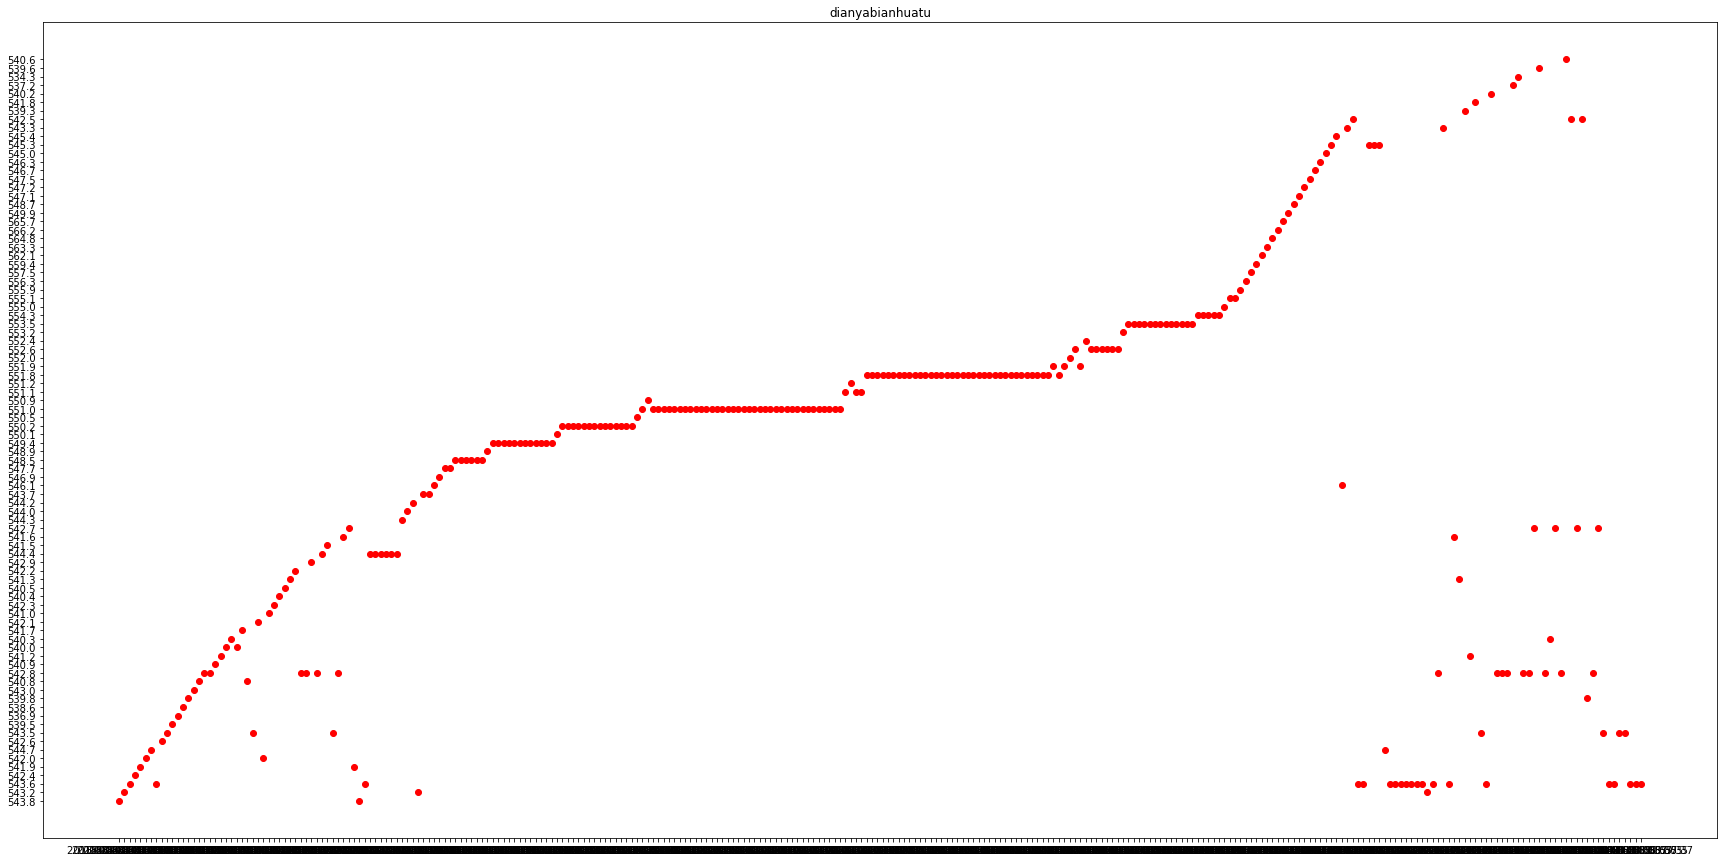

In [7]:
# 根据数据化坐标图

plt.figure(figsize=(30,15))
plt.title('dianyabianhuatu')

# 绘制散点图
plt.scatter(data1['obd_time'],data1['voltage'], color='r')
plt.show()

<IPython.core.display.Javascript object>


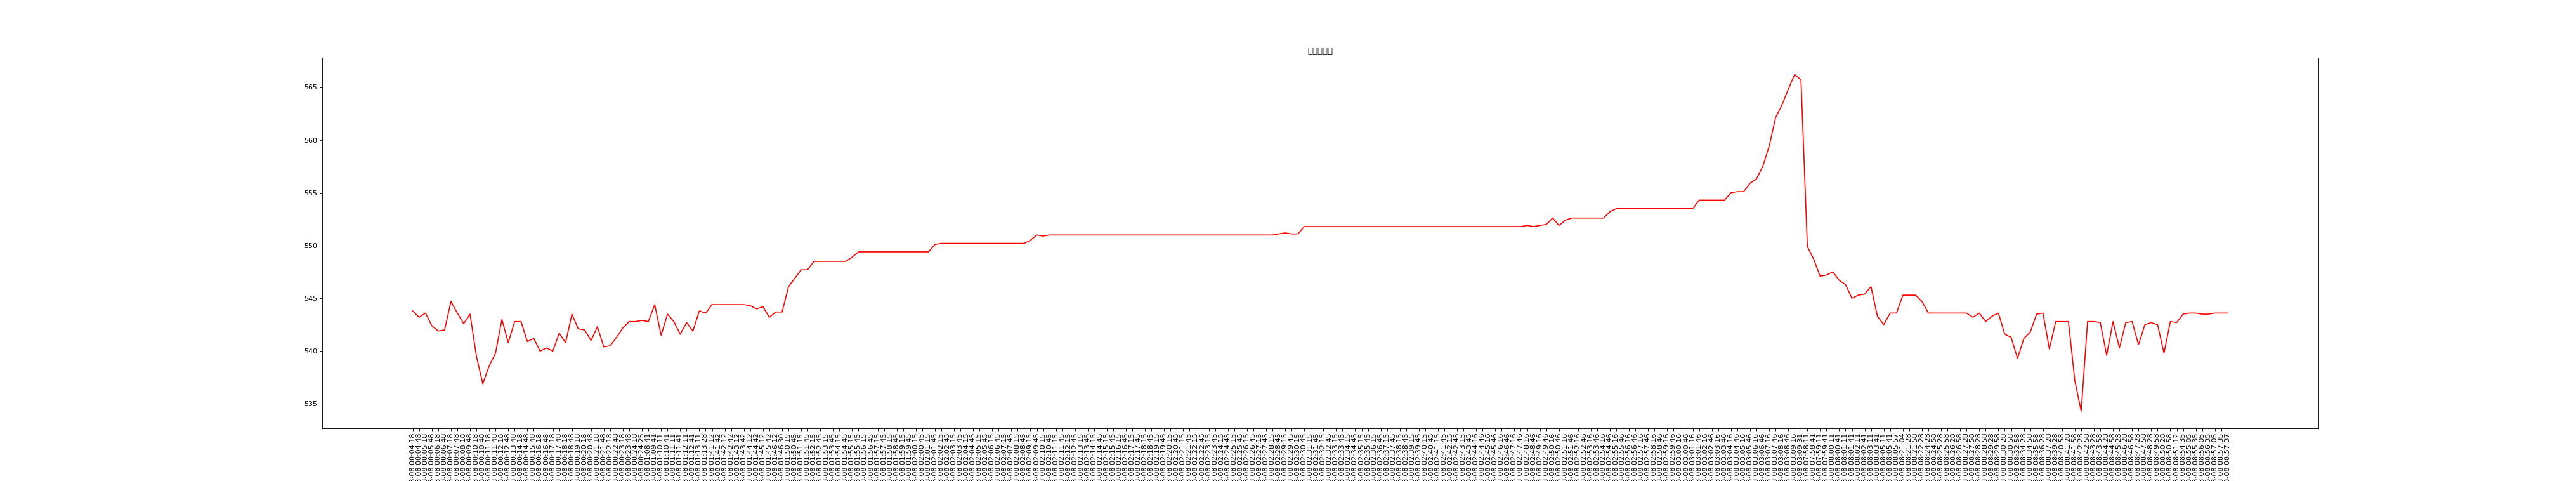

<IPython.core.display.Javascript object>


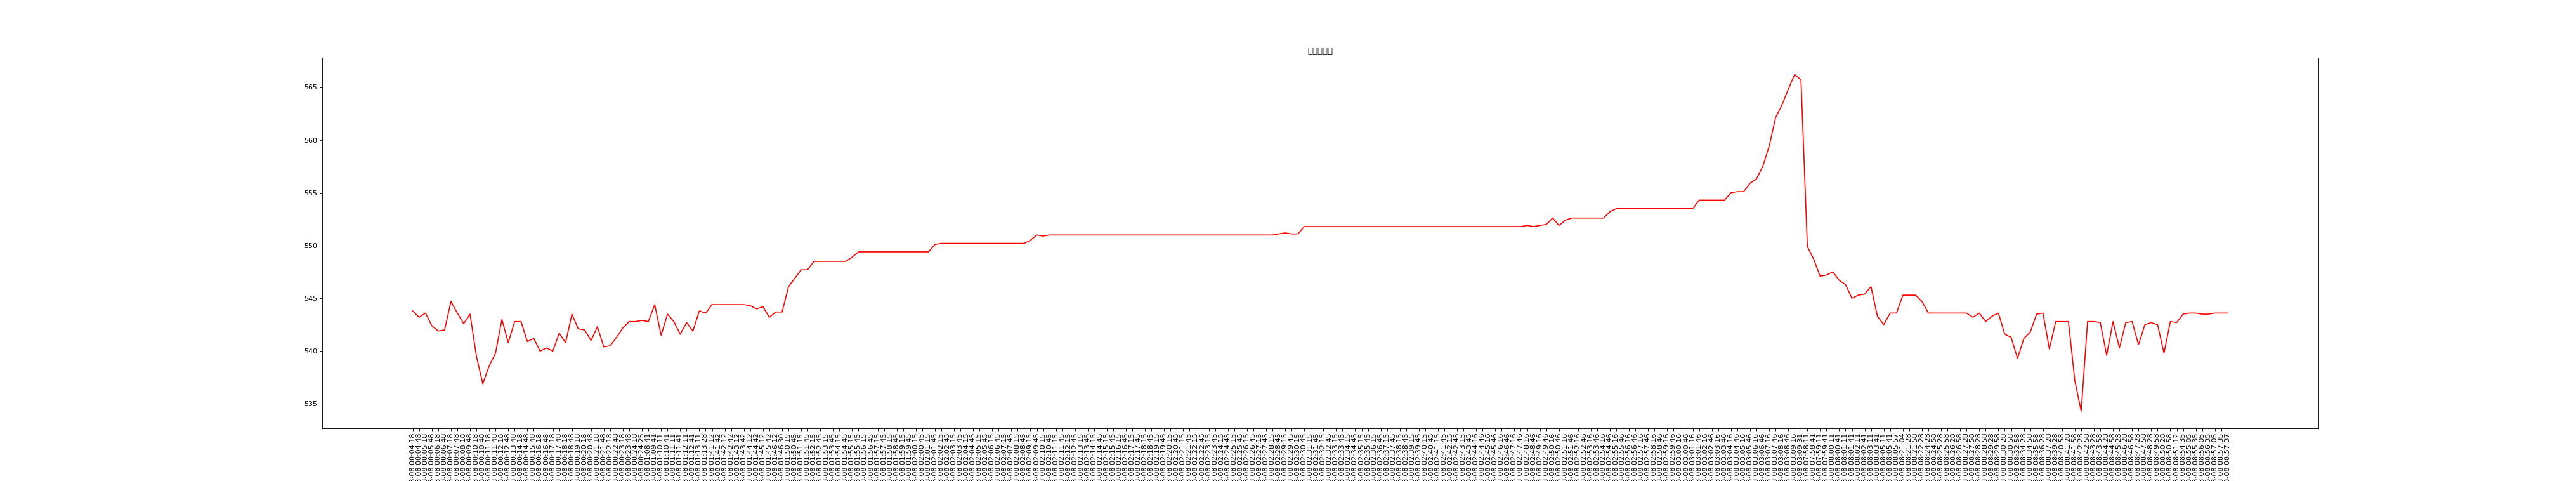

Text(0.5, 1.0, '电压变化图')

([<matplotlib.axis.XTick at 0x132f5a240>,
 <a list of 286 Text xticklabel objects>)

In [19]:
# 电压趋势图

#data1=data1.head(10)
# 时间序列图的数据集只能有两个字段
data2=pd.DataFrame(data1[['obd_time','voltage']])
data2['voltage']=data2['voltage'].astype('double')

# 设置时间间隔，随数据条数画图可以不设置
# pd.date_range(start='2018-08-08 00:00:00',end='2018-08-08 23:59:59',freq='H')

# 1.将时间字段（字符串类型）转为pandas的时间类型
data2['obd_time'] = pd.to_datetime(data2['obd_time'])

# 2.将时间字段设置为索引,inplace表示原地调整
data2.set_index('obd_time',inplace=True)

# 测试设置索引是否成功
# data2['2018-08-08 00:05:48':]

# 3.为坐标指定索引和值，绘图使用的是索引为横坐标
_x = data2.index
_y = data2.values

plt.figure(figsize=(100,10),dpi=80)
plt.title('电压变化图')

plt.plot(range(len(_x)),_y,color='r')
# rotation表字体倾斜45度
plt.xticks(range(len(_x)),_x,rotation=90)
plt.show()

<IPython.core.display.Javascript object>


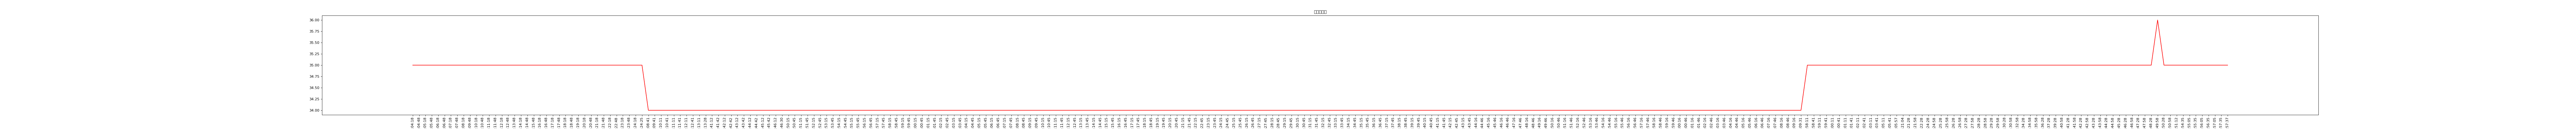

<IPython.core.display.Javascript object>


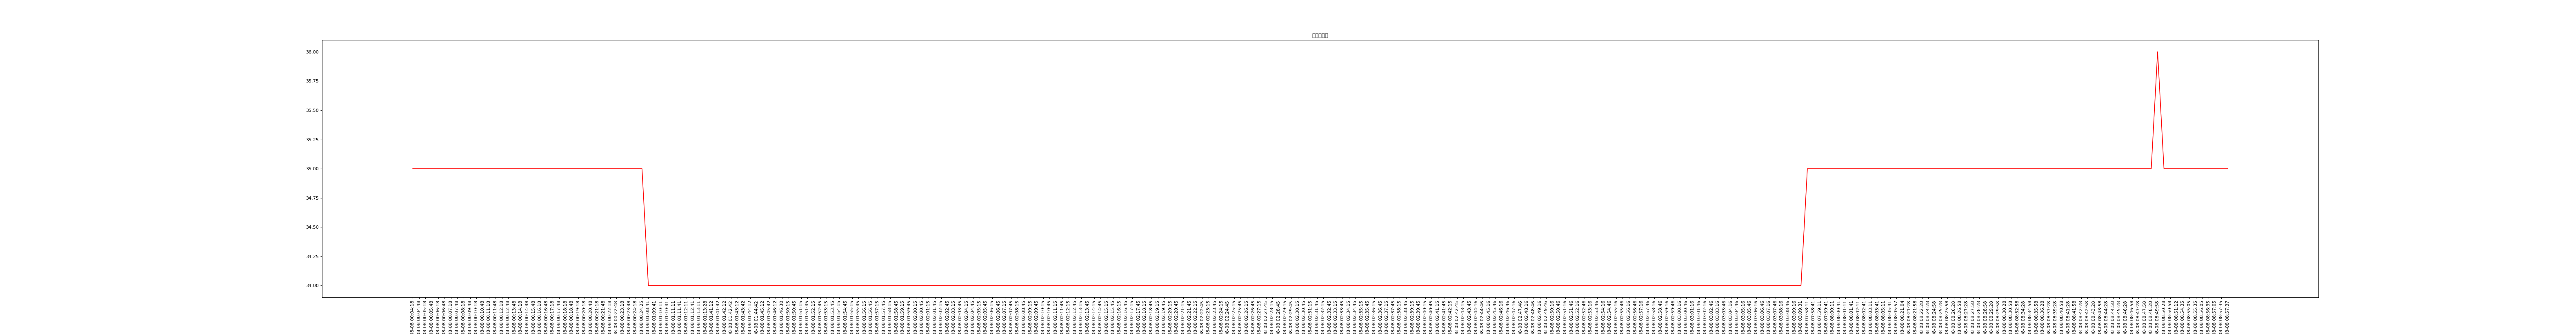

Text(0.5, 1.0, '电流变化图')

([<matplotlib.axis.XTick at 0x13d32b780>,
 <a list of 286 Text xticklabel objects>)

In [24]:
# 电流变化图

#data1=data1.head(10)
# 时间序列图的数据集只能有两个字段
data3=pd.DataFrame(data1[['obd_time','current']])
data3['current']=data3['current'].astype('double')

# 设置时间间隔，随数据条数画图可以不设置
# pd.date_range(start='2018-08-08 00:00:00',end='2018-08-08 23:59:59',freq='H')

# 1.将时间字段（字符串类型）转为pandas的时间类型
data3['obd_time'] = pd.to_datetime(data3['obd_time'])

# 2.将时间字段设置为索引,inplace表示原地调整
data3.set_index('obd_time',inplace=True)

# 测试设置索引是否成功
# data2['2018-08-08 00:05:48':]

# 3.为坐标指定索引和值，绘图使用的是索引为横坐标
_x = data2.index
_y = data2.values

plt.figure(figsize=(100,5),dpi=80)
plt.title('电流变化图')

plt.plot(range(len(_x)),_y,color='r')
# rotation表字体倾斜45度
plt.xticks(range(len(_x)),_x,rotation=90)
plt.show()

<IPython.core.display.Javascript object>


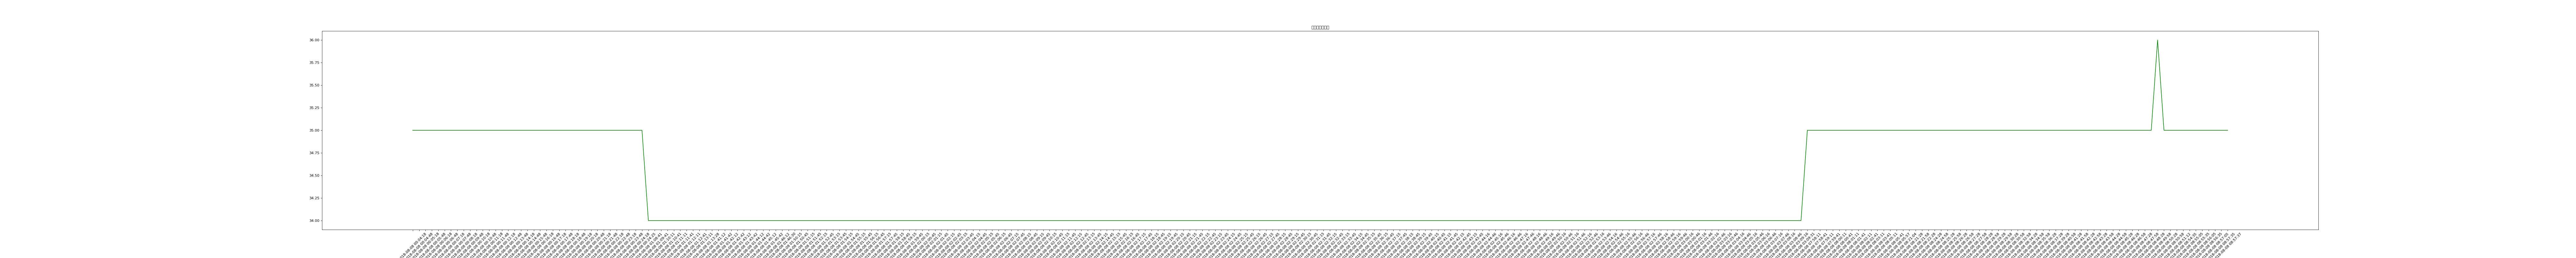

<IPython.core.display.Javascript object>


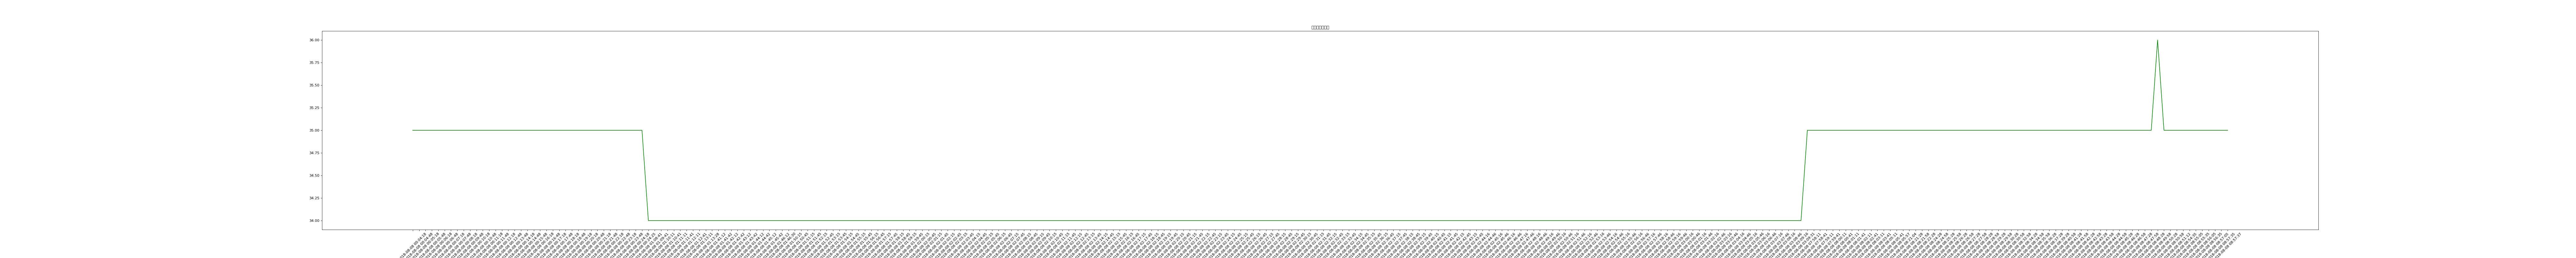

Text(0.5, 1.0, '最高温度变化图')

([<matplotlib.axis.XTick at 0x13f6faf60>,
 <a list of 286 Text xticklabel objects>)

In [25]:
# 最高温度变化图

#data1=data1.head(10)
# 时间序列图的数据集只能有两个字段
data2=pd.DataFrame(data1[['obd_time','maximum_temperature_value']])
data2['maximum_temperature_value']=data2['maximum_temperature_value'].astype('double')

# 设置时间间隔，随数据条数画图可以不设置
# pd.date_range(start='2018-08-08 00:00:00',end='2018-08-08 23:59:59',freq='H')

# 1.将时间字段（字符串类型）转为pandas的时间类型
data2['obd_time'] = pd.to_datetime(data2['obd_time'])

# 2.将时间字段设置为索引,inplace表示原地调整
data2.set_index('obd_time',inplace=True)

# 测试设置索引是否成功
# data2['2018-08-08 00:05:48':]

# 3.为坐标指定索引和值，绘图使用的是索引为横坐标
_x = data2.index
_y = data2.values

plt.figure(figsize=(100,10),dpi=80)
plt.title('最高温度变化图')

plt.plot(range(len(_x)),_y,color='g')
# rotation表字体倾斜45度
plt.xticks(range(len(_x)),_x,rotation=45)
plt.show()

<Figure size 1600x480 with 0 Axes>

Text(0.5, 1.0, '最低温度变化图')

([<matplotlib.axis.XTick at 0x123282cc0>,
 <a list of 286 Text xticklabel objects>)

/Users/ppx/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ppx/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20302 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ppx/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 28201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ppx/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ppx/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ppx/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21

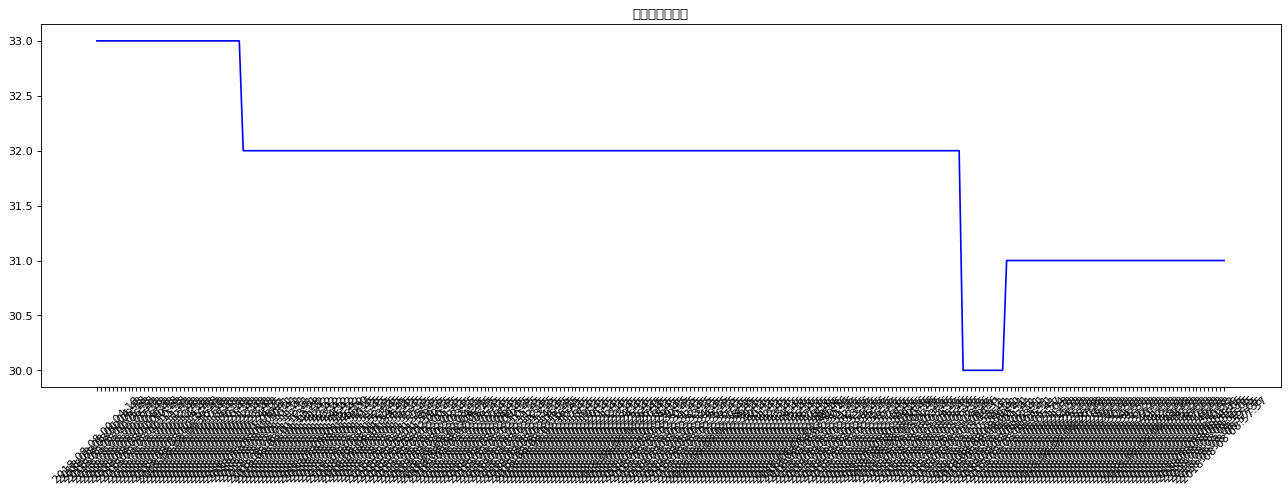

In [19]:
# 最低温度变化图

#data1=data1.head(10)
# 时间序列图的数据集只能有两个字段
data2=pd.DataFrame(data1[['obd_time','minimum_temperature_value']])
data2['minimum_temperature_value']=data2['minimum_temperature_value'].astype('double')

# 设置时间间隔，随数据条数画图可以不设置
# pd.date_range(start='2018-08-08 00:00:00',end='2018-08-08 23:59:59',freq='H')

# 1.将时间字段（字符串类型）转为pandas的时间类型
data2['obd_time'] = pd.to_datetime(data2['obd_time'])

# 2.将时间字段设置为索引,inplace表示原地调整
data2.set_index('obd_time',inplace=True)

# 测试设置索引是否成功
# data2['2018-08-08 00:05:48':]

# 3.为坐标指定索引和值，绘图使用的是索引为横坐标
_x = data2.index
_y = data2.values

plt.figure(figsize=(20,6),dpi=80)
plt.title('最低温度变化图')

plt.plot(range(len(_x)),_y,color='b')
# rotation表字体倾斜45度
plt.xticks(range(len(_x)),_x,rotation=45)
plt.show()

In [40]:
Array1 = [[1, 2, 3], [4, 5, 6]]
Array2 = [[11, 25, 346], [734, 48, 49]]
Mat1 = np.array(Array1)
Mat2 = np.array(Array2)
Mat1
Mat2
correlation = np.corrcoef(Mat1, Mat2)
print("矩阵1=\n", Mat1)
print("矩阵2=\n", Mat2)
print("相关系数=\n", correlation)


array([[1, 2, 3],
       [4, 5, 6]])

array([[ 11,  25, 346],
       [734,  48,  49]])

矩阵1=
 [[1 2 3]
 [4 5 6]]
矩阵2=
 [[ 11  25 346]
 [734  48  49]]
相关系数=
 [[ 1.     1.     0.884 -0.865]
 [ 1.     1.     0.884 -0.865]
 [ 0.884  0.884  1.    -0.531]
 [-0.865 -0.865 -0.531  1.   ]]


DataFrame[obd_time: string, charge_status: string, voltage: string, current: string, battery_cell_voltage_highest_value: string, battery_cell_voltage_lowest_value: string, maximum_temperature_value: string, minimum_temperature_value: string, highest_alert_level: string, temperature_difference_alert: string, battery_high_temperature_alert: string, energy_storage_device_high_voltage_alert: string, energy_storage_device_low_voltage_alert: string, soc_low_alert: string, single_battery_high_voltage_alert: string, single_battery_low_voltage_alert: string, soc_too_high_alert: string, soc_jumping_alert: string, rechargeable_energy_storage_system_mismatch_alert: string, battery_cell_consistency_low_alert: string, insulation_alert: string, dc_dc_temperature_alert: string, braking_system_alert: string, dc_dc_status_alert: string, motor_controller_temperature_alert: string, hvil_alert: string, motor_temperature_alert: string, energy_storage_device_over_charge_alert: string, battery_faults_count: s